# Test di Pearson - Dati giornalieri

Di seguito viene utilizzato il test di Pearson, per scegliere i migliori coefficienti a e b della distribuzione di Gumbel, ricavati da: metodo dei momenti, minimi quadrati e massima versimiglianza. 

Il test di Pearson è un test non parametrico che applica la distribuzione del Chi quadro ai dati per scegliere la coppia di parametri migliore per ogni durata di precipitazione.

In [19]:
import os
import math
from pandas import *
import pandas as pd
from datetime import datetime
%matplotlib inline 
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm
from scipy.stats import genextreme,gumbel_r
from numpy import linspace
from pylab import plot,show,hist,figure,title
from my_functions import*
os.getcwd()

'C:\\Users\\Tom\\1A_Idrologia\\dati\\xz. Esercitazione1'

In [20]:
data=leggi_giornaliere('MORI_massimi di precipitazione.xls')
#data

In [21]:
ab_m=pd.read_pickle("ab_m")
ab_mq=pd.read_pickle("ab_mq")
ab_ml=pd.read_pickle("ab_ml")

In [22]:
a=[]
for h in data.columns:
    a=a+[[X2(data,ab_m,h,0.2),X2(data,ab_mq,h,0.2),X2(data,ab_ml,h,0.2)]]

pd.DataFrame(a,index=["1 giorno","2 giorni", "3 giorni","4 giorni","5 giorni"],columns=["M","MQ","ML"])

,M,MQ,ML
1 giorno,1.517241,1.517241,2.896552
2 giorni,4.275862,4.275862,4.275862
3 giorni,4.620690,1.172414,4.620690
4 giorni,1.862069,1.517241,1.172414
5 giorni,0.482759,1.517241,0.482759


In [23]:
best=DataFrame([ab_m["1 giorno"],
                ab_m["2 giorni"],
                ab_mq["3 giorni"],
                ab_ml["4 giorni"],ab_m["5 giorni"]]).T
                  
best

,1 giorno,2 giorni,3 giorni,4 giorni,5 giorni
a,58.305148,80.471032,90.750149,103.428785,110.602875
b,15.439798,19.728481,20.115120,27.417951,27.582867


In [24]:
best.to_pickle("best_param")

In [25]:
def gumbel(x,abs_d,col):
    return np.exp(-np.exp(-(x-abs_d[col]["a"])/abs_d[col]["b"]))
t_rain=np.linspace(data.min()[0],data.max()[3],100)

In [26]:
gb=pd.DataFrame([gumbel(t_rain,best,"1 giorno"),
                 gumbel(t_rain,best,"2 giorni"),
                 gumbel(t_rain,best,"3 giorni"),
                 gumbel(t_rain,best,"4 giorni"),gumbel(t_rain,best,"5 giorni")]).T
gb.index=t_rain
gb.columns=["1 giorno","2 giorni","3 giorni","4 giorni","5 giorni"]
gb[-5:]

,1 giorno,2 giorni,3 giorni,4 giorni,5 giorni
33.000000,0.005801,0.000015,2.151864e-08,0.000002,5.774460e-08
34.678788,0.009861,0.000038,8.845768e-08,0.000005,1.545011e-07
36.357576,0.015870,0.000086,3.247124e-07,0.000010,3.900438e-07
38.036364,0.024321,0.000185,1.074091e-06,0.000019,9.322813e-07
39.715152,0.035667,0.000374,3.228365e-06,0.000037,2.116580e-06
...,...,...,...,...,...
192.484848,0.999832,0.996585,9.936595e-01,0.961897,9.499213e-01
194.163636,0.999849,0.996863,9.941657e-01,0.964119,9.528074e-01
195.842424,0.999865,0.997118,9.946316e-01,0.966213,9.555311e-01
197.521212,0.999879,0.997353,9.950604e-01,0.968188,9.581011e-01


([<matplotlib.lines.Line2D at 0x1ec6d0647c8>],
 [<matplotlib.lines.Line2D at 0x1ec6d09cf48>])

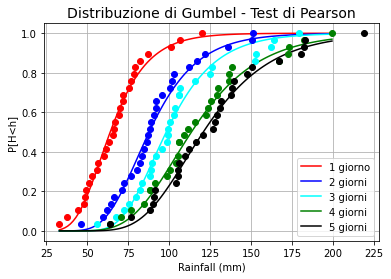

In [27]:
plot_pearson_giornaliere(data, gb)